In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_json('../ultimate_challenge/logins.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


Okay so here we can see that there is no other information in this data other than the timestamp for logins to the Ultimate app.  The first step in this process is to aggregate these logins into 15 minute intervals with a count for the number of logins in each interval period. 

In [5]:
quarter_hour = df.resample('15min', on='login_time').count()

In [6]:
quarter_hour.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [10]:
quarter_hour = quarter_hour.rename(columns={'login_time':'count'})
quarter_hour = quarter_hour.reset_index()
quarter_hour.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


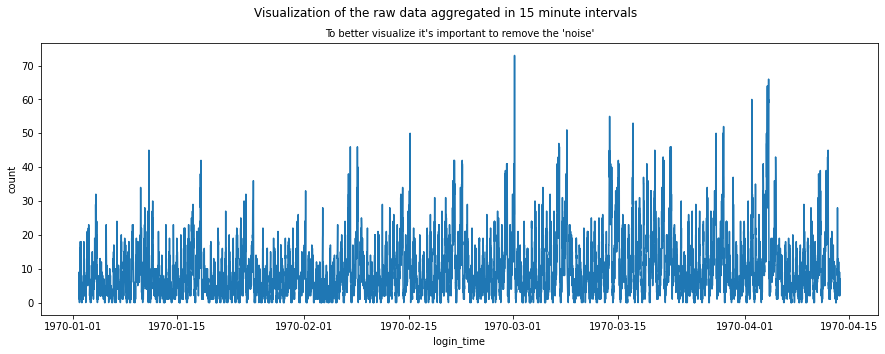

In [17]:
x = quarter_hour['login_time']
y = quarter_hour['count']
plt.figure(figsize=(15,5))
sns.lineplot(x=x, y=y)
plt.suptitle('Visualization of the raw data aggregated in 15 minute intervals', size='large')
plt.title("To better visualize it's important to remove the 'noise'", size='medium');

Here we can see that this is a time series with a stationary mean, however the standard deviation appears to be non-stationary.  